In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")


In [24]:
# Load Spotify dataset
df = pd.read_csv('SpotifyFeatures.csv')  # Make sure your CSV is in the same folder

# Basic info
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [25]:
# Add duration in minutes
df['duration_min'] = df['duration_ms'] / 60000


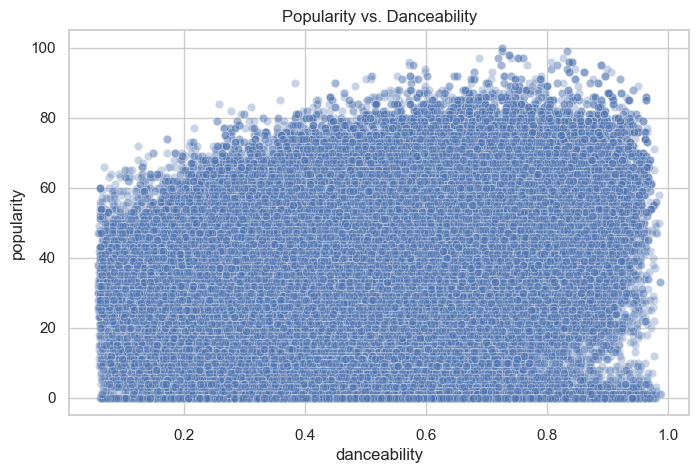

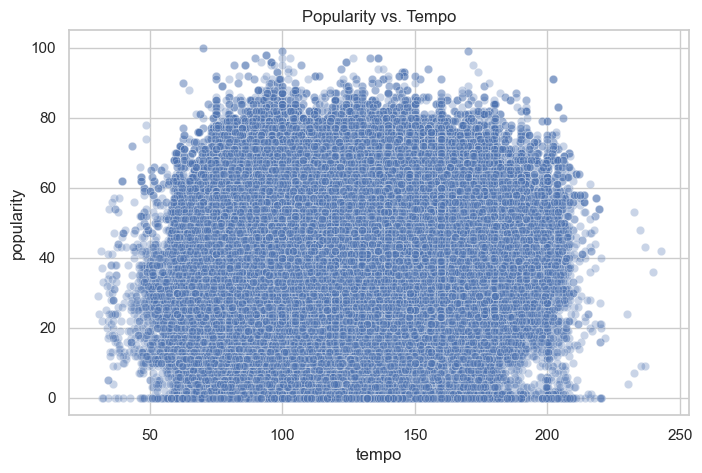

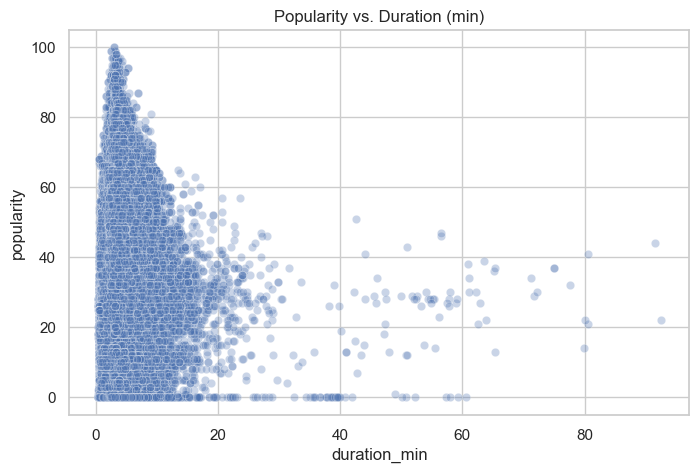

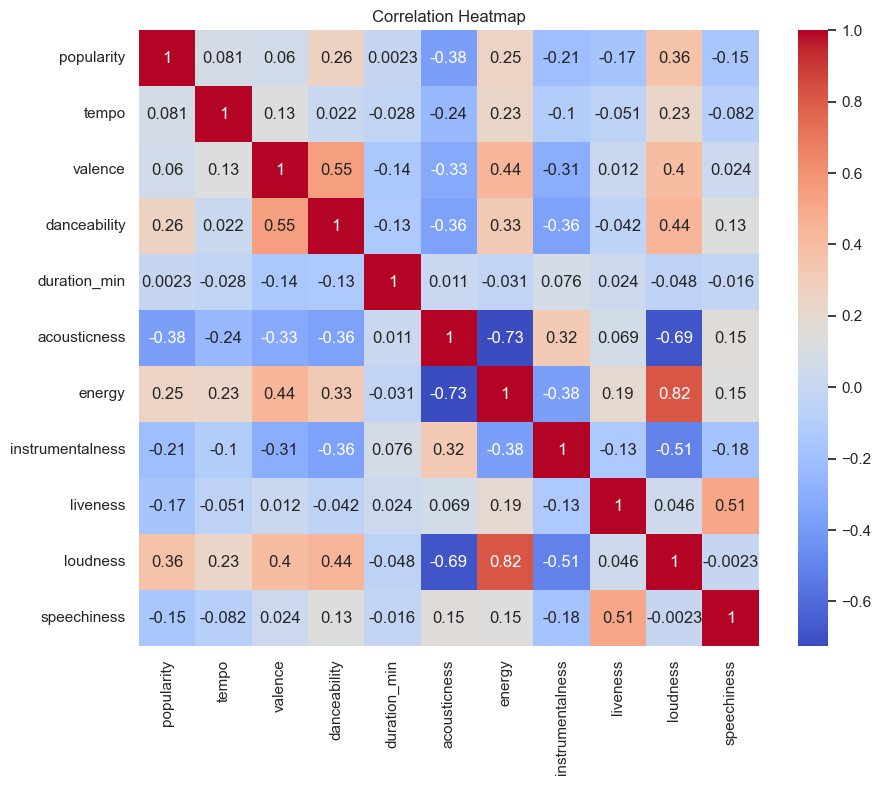

In [26]:
# Popularity vs Danceability
plt.figure(figsize=(8,5))
sns.scatterplot(x='danceability', y='popularity', data=df, alpha=0.3)
plt.title('Popularity vs. Danceability')
plt.show()

# Popularity vs Tempo
plt.figure(figsize=(8,5))
sns.scatterplot(x='tempo', y='popularity', data=df, alpha=0.3)
plt.title('Popularity vs. Tempo')
plt.show()

# Popularity vs Duration
plt.figure(figsize=(8,5))
sns.scatterplot(x='duration_min', y='popularity', data=df, alpha=0.3)
plt.title('Popularity vs. Duration (min)')
plt.show()

# Correlation heatmap
features = ['popularity', 'tempo', 'valence', 'danceability', 'duration_min',
            'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness']
corr = df[features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [27]:
# Select features & target
X = df[['tempo', 'valence', 'danceability', 'duration_min',
        'acousticness', 'energy', 'instrumentalness', 'liveness',
        'loudness', 'speechiness']]
y = df['popularity']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
sc.fit()

# Train model
model = Ridge(alpha=0.3)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nFeature coefficients:")
print(coefficients.sort_values(ascending=False))


RMSE: 15.97
R² Score: 0.23

Feature coefficients:
danceability        17.518893
loudness             0.712309
duration_min         0.132978
tempo               -0.003832
instrumentalness    -4.415427
energy              -5.447727
speechiness         -8.197658
liveness            -9.708092
acousticness       -11.852001
valence            -13.214024
dtype: float64


In [28]:
# ✅ Make a new prediction with custom input values

# Example: set your own song features here
new_song = {
    'tempo': 130.931,           # beats per minute
    'valence': 0.06,         # positive mood (0 to 1)
    'danceability': 0.512,    # danceability (0 to 1)
    'duration_min': 3.7,    # duration in minutes
    'acousticness': 5.63e-05,    # acoustic feel (0 to 1)
    'energy': 0.9,          # energy level (0 to 1)
    'instrumentalness': 0.0,# 0 means no instrumentals
    'liveness': 0.347,        # live performance feel (0 to 1)
    'loudness': -2.1,         # average loudness in dB
    'speechiness': 0.114    # spoken words presence (0 to 1)
}

# Convert to DataFrame with 1 row
import pandas as pd

new_song_df = pd.DataFrame([new_song])

# Predict
predicted_popularity = model.predict(new_song_df)

print(f"🔮 Predicted Popularity Score: {predicted_popularity[0]:.2f} (out of 100)")


🔮 Predicted Popularity Score: 52.85 (out of 100)
